In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
pd.options.mode.copy_on_write=True

In [65]:
tickers_list=['AAPL', 'NVDA', 'MSFT', 'TSM', 'META', 'GOOG',]
appl=yf.Ticker("AAPL")
nvda=yf.Ticker("NVDA")

tk_dict={}
for t in tickers_list:
    tk_dict[t]=yf.Ticker(t)


In [66]:
#dtype='datetime64[ns, America/New_York]', name='Date', length=250, freq=None
#missing_indices for test year [29, 60, 95, 124, 159, 190, 219] 
apple_test=pd.read_csv('apple_2023_masked.csv', index_col=0)
apple_test.index=apple_test.index.astype('datetime64[ns, America/New_York]')


In [80]:
stocks_apple_train=appl.history(start='2020-01-01', end='2022-12-31', interval="1d")
stocks_nvidia_train=nvda.history(start='2020-01-01', end='2022-12-31', interval="1d")
stocks_nvidia_test=nvda.history(start='2023-01-01', end='2023-12-31', interval="1d")

train_df_dict={}
for t in tickers_list[1:]:
    train_df_dict[t]=tk_dict[t].history(start='2020-01-01', end='2022-12-31', interval="1d")[['Close']]

test_df_dict={}
for t in tickers_list[1:]:
    test_df_dict[t]=tk_dict[t].history(start='2023-01-01', end='2023-12-31', interval="1d")[['Close']]



In [68]:
max_interval=5
intervals=[i for i in range(1,max_interval+1)]
n_rows=len(stocks_apple_train)
np.random.seed(150)
missing_indices=np.sort(np.random.randint(20, n_rows-20, size=30))
bins=np.digitize(missing_indices, bins=list(range(0, n_rows-max_interval+1, 25)))

curr_index=0
missing_indices_cleaned=[missing_indices[curr_index]]

for i,bin in enumerate(bins):
    if(bins[i]!=bins[curr_index]):
        curr_index=i
        missing_indices_cleaned.append(missing_indices[curr_index])


indices_to_mask= [np.ravel(np.array([list(range(i,i+interval)) for i in missing_indices_cleaned])) for interval in intervals]
indices_to_mask

[array([ 37,  69, 101, 162, 176, 210, 231, 255, 290, 314, 326, 386, 417,
        433, 462, 503, 527, 624, 640]),
 array([ 37,  38,  69,  70, 101, 102, 162, 163, 176, 177, 210, 211, 231,
        232, 255, 256, 290, 291, 314, 315, 326, 327, 386, 387, 417, 418,
        433, 434, 462, 463, 503, 504, 527, 528, 624, 625, 640, 641]),
 array([ 37,  38,  39,  69,  70,  71, 101, 102, 103, 162, 163, 164, 176,
        177, 178, 210, 211, 212, 231, 232, 233, 255, 256, 257, 290, 291,
        292, 314, 315, 316, 326, 327, 328, 386, 387, 388, 417, 418, 419,
        433, 434, 435, 462, 463, 464, 503, 504, 505, 527, 528, 529, 624,
        625, 626, 640, 641, 642]),
 array([ 37,  38,  39,  40,  69,  70,  71,  72, 101, 102, 103, 104, 162,
        163, 164, 165, 176, 177, 178, 179, 210, 211, 212, 213, 231, 232,
        233, 234, 255, 256, 257, 258, 290, 291, 292, 293, 314, 315, 316,
        317, 326, 327, 328, 329, 386, 387, 388, 389, 417, 418, 419, 420,
        433, 434, 435, 436, 462, 463, 464, 465, 503,

In [7]:
missing_indices_cleaned

[37,
 69,
 101,
 162,
 176,
 210,
 231,
 255,
 290,
 314,
 326,
 386,
 417,
 433,
 462,
 503,
 527,
 624,
 640]

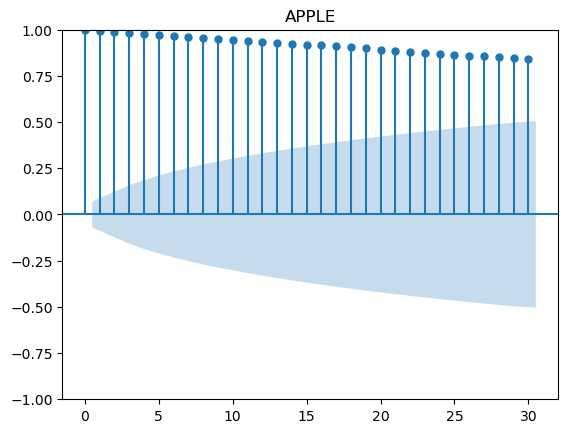

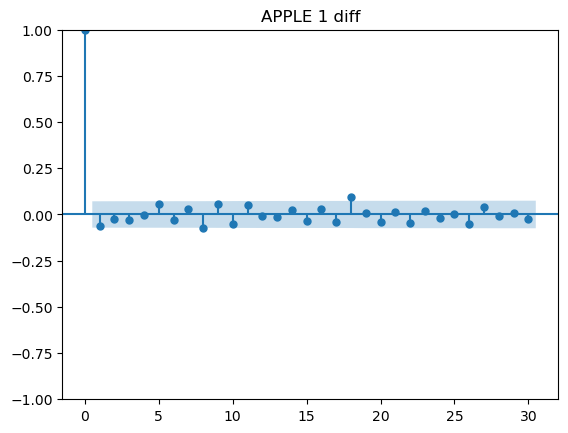

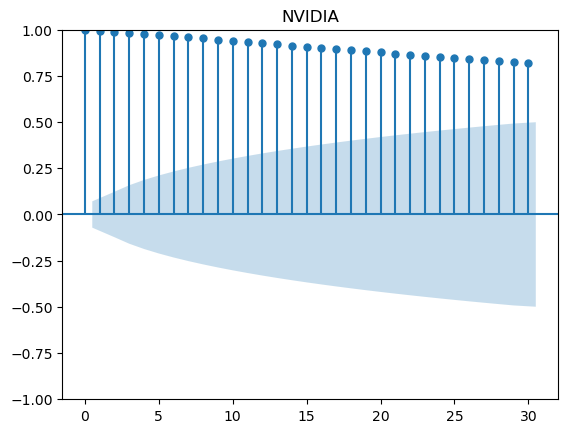

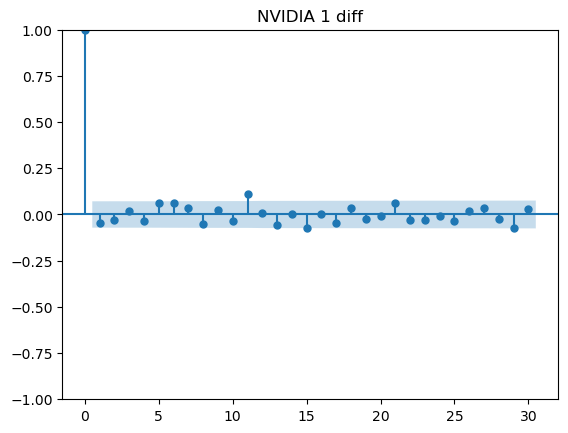

In [8]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.graphics.tsa.plot_acf(stocks_apple_train.Close.values, lags = 30, title='APPLE')
sm.graphics.tsa.plot_acf(stocks_apple_train.Close.diff().values[1:], lags = 30, title='APPLE 1 diff')
sm.graphics.tsa.plot_acf(stocks_nvidia_train.Close.values, lags = 30, title='NVIDIA')
sm.graphics.tsa.plot_acf(stocks_nvidia_train.Close.diff().values[1:], lags = 30, title='NVIDIA 1 diff')
plt.show()


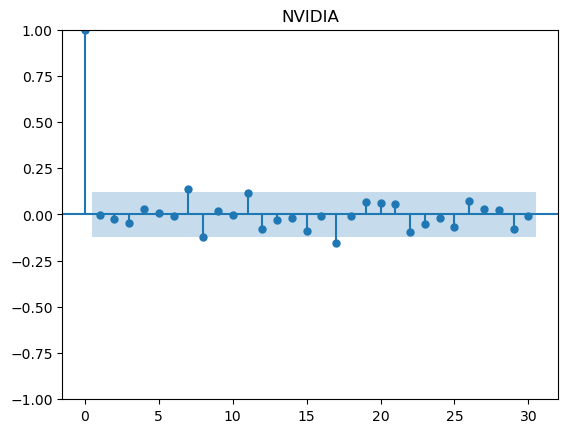

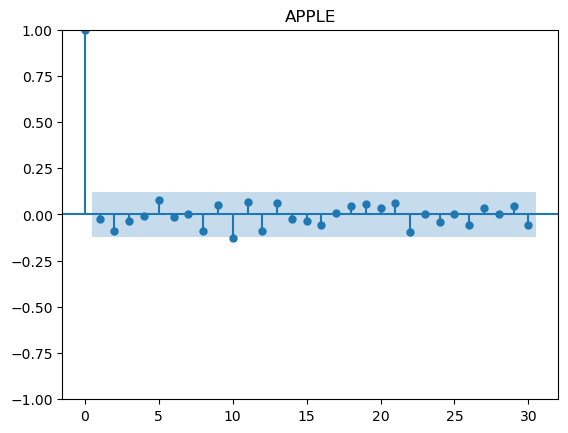

In [9]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sm.graphics.tsa.plot_pacf(stocks_nvidia_train.diff().Close.values[-252:], lags = 30, title='NVIDIA')
sm.graphics.tsa.plot_pacf(stocks_apple_train.diff().Close.values[-252:], lags = 30, title='APPLE')
plt.show()


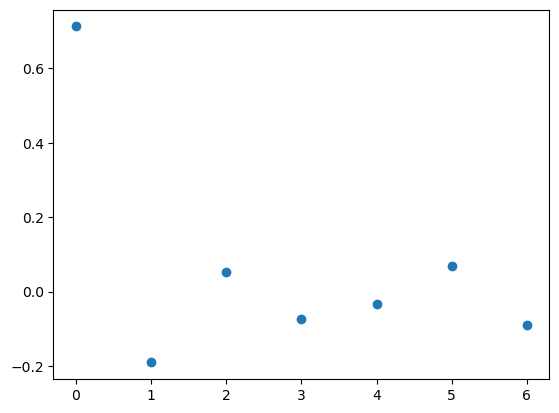

In [10]:
from statsmodels.tsa.stattools import ccf
n_lags=7#len(stocks_nvidia_train.pct_change(fill_method=None).dropna().Close.values)
crosscorr=ccf(stocks_nvidia_train.pct_change(fill_method=None).Close.dropna().values,stocks_apple_train.pct_change(fill_method=None).Close.dropna().values, nlags=n_lags)
plt.scatter(x=[i for i in range(n_lags)], y=crosscorr)


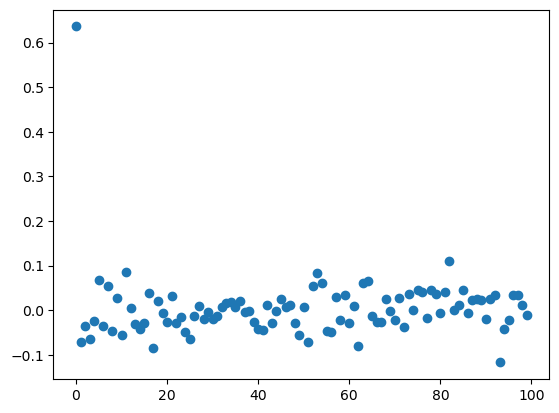

In [11]:
n_lags=100#len(df_nvidia_train.pct_change(fill_method=None).dropna().Close.values)
crosscorr=ccf(stocks_nvidia_train.diff().dropna().Close.values,stocks_apple_train.diff().dropna().Close.values, nlags=n_lags)
plt.scatter(x=[i for i in range(n_lags)], y=crosscorr)

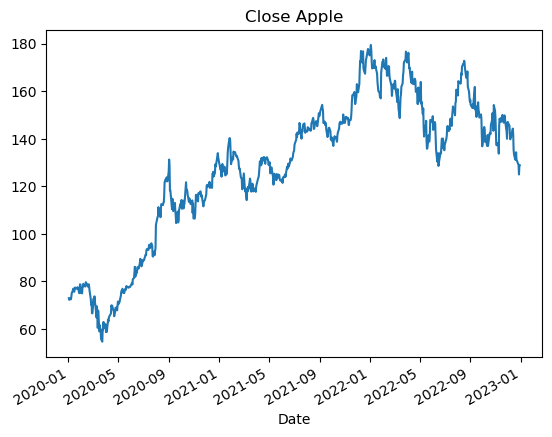

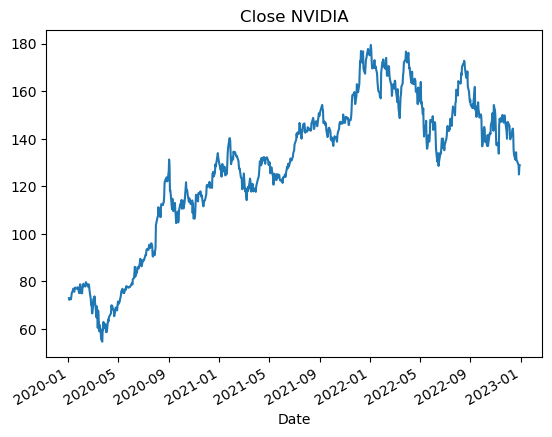

In [22]:
stocks_apple_train['Close'].plot(title='Close Apple')
plt.show()
stocks_apple_train['Close'].plot(title='Close NVIDIA')
plt.show()


In [23]:
df_apple_train=stocks_apple_train[['Close']]
df_nvidia_train=stocks_nvidia_train[['Close']]

In [24]:
indices_to_mask[1]

array([ 37,  38,  69,  70, 101, 102, 162, 163, 176, 177, 210, 211, 231,
       232, 255, 256, 290, 291, 314, 315, 326, 327, 386, 387, 417, 418,
       433, 434, 462, 463, 503, 504, 527, 528, 624, 625, 640, 641])

In [48]:
for i in range(max_interval):
    df_apple_train[f'{i+1}day']=df_apple_train.Close
    df_apple_train.iloc[indices_to_mask[i], i+1]=np.NaN
  #  df_nvidia_train[f'{i+1}day']=df_apple_train.Close
  #  df_nvidia_train.iloc[indices_to_mask[i], i+1]=np.NaN

display(df_apple_train.head())
#display(df_nvidia_train.head())

,Close,1day,2day,3day,4day,5day
Date,,,,,,
2020-01-02 00:00:00-05:00,72.960464,72.960464,72.960464,72.960464,72.960464,72.960464
2020-01-03 00:00:00-05:00,72.251129,72.251129,72.251129,72.251129,72.251129,72.251129
2020-01-06 00:00:00-05:00,72.826851,72.826851,72.826851,72.826851,72.826851,72.826851
2020-01-07 00:00:00-05:00,72.484337,72.484337,72.484337,72.484337,72.484337,72.484337
2020-01-08 00:00:00-05:00,73.650345,73.650345,73.650345,73.650345,73.650345,73.650345


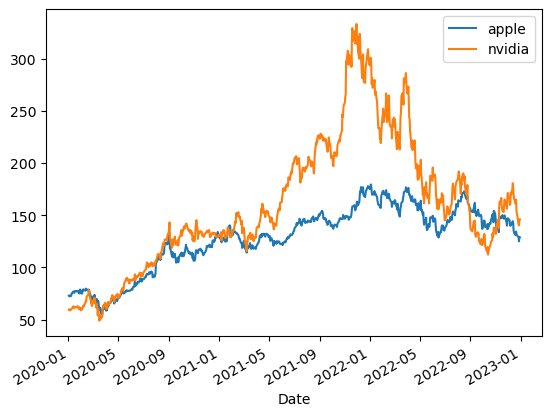

In [26]:
df_apple_train.Close.plot(label='apple')
df_nvidia_train.Close.plot(label='nvidia')
plt.legend()

In [27]:
missing_indices_cleaned


[37,
 69,
 101,
 162,
 176,
 210,
 231,
 255,
 290,
 314,
 326,
 386,
 417,
 433,
 462,
 503,
 527,
 624,
 640]

In [28]:
baseline=df_apple_train[['Close']].copy()
for i in range(max_interval):
    baseline[f'{i+1}day']=baseline.Close
    baseline.iloc[indices_to_mask[i], 2*i+1]=np.NaN
    baseline[f'{i+1}day_imputed']=np.NaN
    for j in missing_indices_cleaned:
        avg=(baseline.Close.iloc[j-1]+baseline.Close.iloc[j+i+1])/2
        for k in range(i+1):
            baseline.iloc[k+j, 2*i+2 ]=avg

baseline.head(5)

,Close,1day,1day_imputed,2day,2day_imputed,3day,3day_imputed,4day,4day_imputed,5day,5day_imputed
Date,,,,,,,,,,,
2020-01-02 00:00:00-05:00,72.960464,72.960464,NaN,72.960464,NaN,72.960464,NaN,72.960464,NaN,72.960464,NaN
2020-01-03 00:00:00-05:00,72.251129,72.251129,NaN,72.251129,NaN,72.251129,NaN,72.251129,NaN,72.251129,NaN
2020-01-06 00:00:00-05:00,72.826851,72.826851,NaN,72.826851,NaN,72.826851,NaN,72.826851,NaN,72.826851,NaN
2020-01-07 00:00:00-05:00,72.484337,72.484337,NaN,72.484337,NaN,72.484337,NaN,72.484337,NaN,72.484337,NaN
2020-01-08 00:00:00-05:00,73.650345,73.650345,NaN,73.650345,NaN,73.650345,NaN,73.650345,NaN,73.650345,NaN


In [71]:
from statsmodels.tools.eval_measures import mse, rmse, rmspe 
scores=pd.DataFrame({'LinearInterp': (np.zeros(5)).fill(np.NaN), 'OLS_NVDA': (np.zeros(5)).fill(np.NaN), 'XGBoostRegr_NVDA': (np.zeros(5)).fill(np.NaN)}, index=['1day', '2day', '3day', '4day', '5day'])
for i in range(max_interval):
    print(f"{i+1} day missing: root mean squared error {rmse(baseline[['Close', f'{1+i}day_imputed']].dropna().Close, baseline[['Close', f'{1+i}day_imputed']].dropna()[f'{1+i}day_imputed'])}")
    print(f"{i+1} day missing: root mean squared percentage error {rmspe(baseline[['Close', f'{1+i}day_imputed']].dropna().Close, baseline[['Close', f'{1+i}day_imputed']].dropna()[f'{1+i}day_imputed'])}")
    print(f"{i+1} day missing: mean squared error {mse(baseline[['Close', f'{1+i}day_imputed']].dropna().Close, baseline[['Close', f'{1+i}day_imputed']].dropna()[f'{1+i}day_imputed'])}")
    scores.loc[f'{i+1}day', 'LinearInterp']=mse(baseline[['Close', f'{1+i}day_imputed']].dropna().Close, baseline[['Close', f'{1+i}day_imputed']].dropna()[f'{1+i}day_imputed'])

scores

1 day missing: root mean squared error 1.865957848595066
1 day missing: root mean squared percentage error 0.1730237143020804
1 day missing: mean squared error 3.4817986927335274
2 day missing: root mean squared error 2.344119242088299
2 day missing: root mean squared percentage error 0.20379390655633373
2 day missing: mean squared error 5.494895021128621
3 day missing: root mean squared error 2.7471383952156745
3 day missing: root mean squared percentage error 0.25394949521946353
3 day missing: mean squared error 7.546769362468152
4 day missing: root mean squared error 2.9691110456447167
4 day missing: root mean squared percentage error 0.2614645952953748
4 day missing: mean squared error 8.815620401369463
5 day missing: root mean squared error 2.908882919451387
5 day missing: root mean squared percentage error 0.26309872142676927
5 day missing: mean squared error 8.461599839076026


,LinearInterp,OLS_NVDA,XGBoostRegr_NVDA
1day,3.481799,None,None
2day,5.494895,None,None
3day,7.546769,None,None
4day,8.81562,None,None
5day,8.4616,None,None


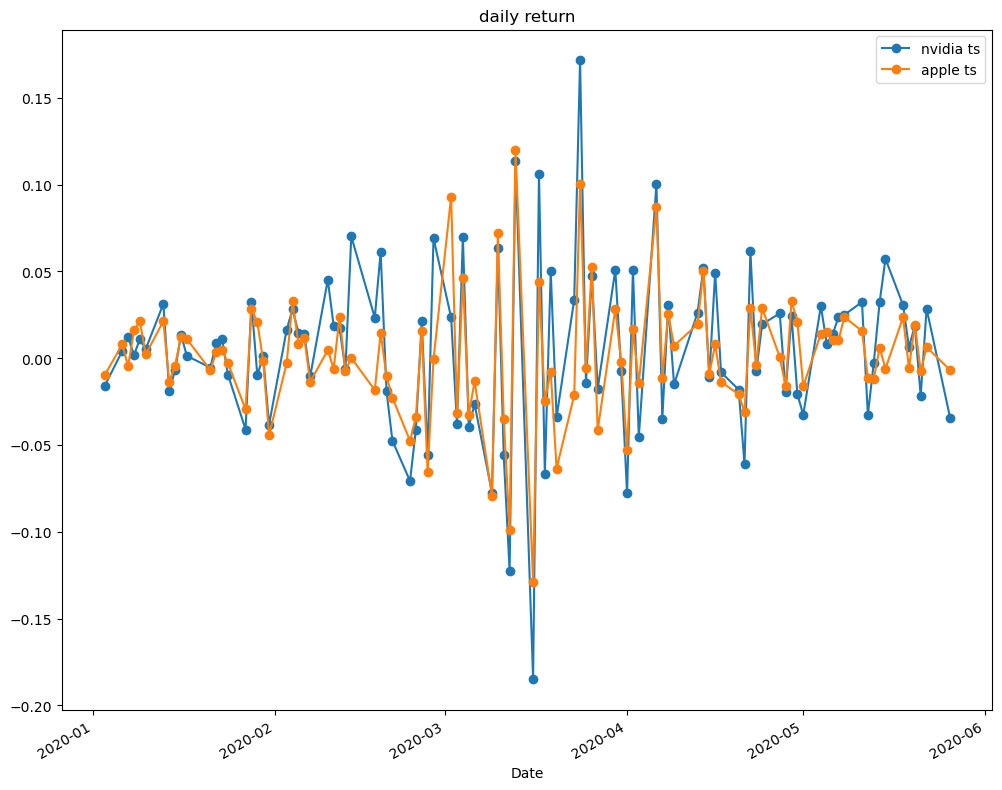

In [30]:
start=0
end=100
ind= [t for t in indices_to_mask[4] if t>=start and t<end]
fig, ax=plt.subplots(figsize=(12,10))
df_nvidia_train.pct_change(fill_method=None).Close[start:end].plot(label='nvidia ts', marker='o')
df_apple_train.pct_change(fill_method=None).Close[start:end].plot(label='apple ts', marker='o')
plt.title('daily return')
ax.legend()


Text(0.5, 1.0, 'Daily return of closing values')

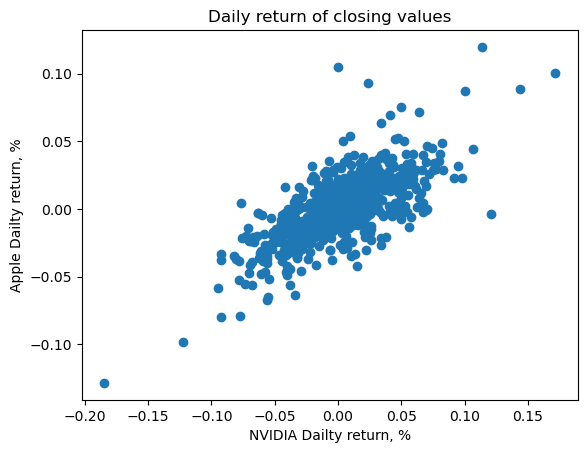

In [31]:
plt.scatter(df_nvidia_train.Close.pct_change(fill_method=None), df_apple_train.Close.pct_change(fill_method=None))
ax = plt.gca()
ax.set_ylabel('Apple Dailty return, %')
ax.set_xlabel('NVIDIA Dailty return, %')
ax.set_title('Daily return of closing values')
#ax.set_xlim([-0.15, 0.10])
#ax.set_ylim([-0.10, 0.08])

In [72]:
def get_pred(pred: pd.Series, df_apple_train: pd.DataFrame, missing_indices_cleaned: np.ndarray, interval: int):
    pred2=[]
    for j in missing_indices_cleaned:
        for i in range(interval):
            try:
                if i==0:
                    pred2.append(df_apple_train.loc[df_apple_train.index[j-1]].Close*(pred.loc[df_apple_train.index[j+i]]+1))
                else:
                    pred2.append(pred2[-1]*(pred.loc[df_apple_train.index[j+i]]+1))
            except:
                print((i,j))
    return pred2

In [73]:
endog = df_apple_train['5day'].pct_change(fill_method=None)

exog = sm.add_constant(df_nvidia_train.Close.pct_change(fill_method=None))
lr=sm.OLS(endog, exog , missing='drop').fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   5day   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     748.1
Date:                Fri, 31 May 2024   Prob (F-statistic):          1.22e-109
Time:                        02:06:48   Log-Likelihood:                 1742.5
No. Observations:                 641   AIC:                            -3481.
Df Residuals:                     639   BIC:                            -3472.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.001      0.175      0.8

In [74]:
#ind=[t for t in range(len(df_apple_train)) if t not in indices_to_mask[4]]
pred=lr.predict(sm.add_constant(df_nvidia_train.Close.pct_change(fill_method=None).iloc[indices_to_mask[4]]))
ground_truth=df_apple_train.Close.pct_change(fill_method=None).iloc[indices_to_mask[4]]


pred2=[]
for i in range(max_interval):
    pred2.append(get_pred(pred, df_apple_train, missing_indices_cleaned, i+1))

print(pred2[4])

residuals=ground_truth-pred

[70.87728162239476, 68.98055491338187, 71.29109648563795, 72.10939102175996, 70.79013143361341, 66.08789650969281, 67.76209926586492, 67.41132370538519, 69.02471082173709, 68.76323776681402, 77.50812492733746, 79.22937710978707, 78.93971547854143, 79.03063992902254, 78.79836587769002, 121.86423991690243, 122.01526103576492, 122.13497940658588, 121.48032776515599, 123.90610532343311, 112.6677456093736, 113.18191636043616, 111.1904245273657, 110.98396287090883, 109.81734788302367, 110.7896953824633, 111.00139948464839, 112.88232705997797, 116.1373617685899, 117.6366255401876, 116.6411237702246, 117.30368171590895, 116.7123429675667, 117.40759397264267, 117.62328448727835, 124.75842101890717, 128.25491636252542, 127.95706553273038, 129.57506131558355, 128.9614151693874, 120.52150878168715, 121.07461935986524, 119.2491250567566, 116.67954996661554, 114.78121336880108, 121.91656153381577, 122.678882990599, 122.15898132783863, 123.37211922429626, 124.1162841119079, 131.57158307090006, 132.37

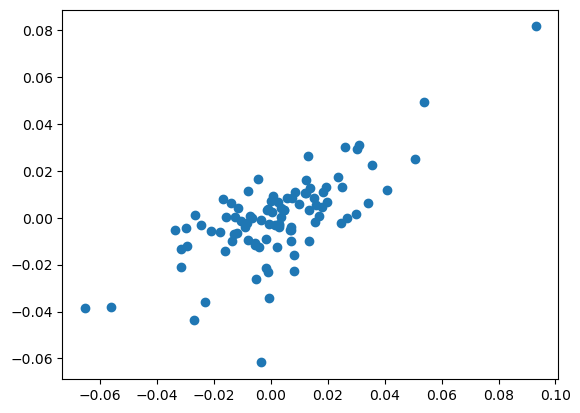

In [75]:
plt.scatter( x=ground_truth, y=residuals)

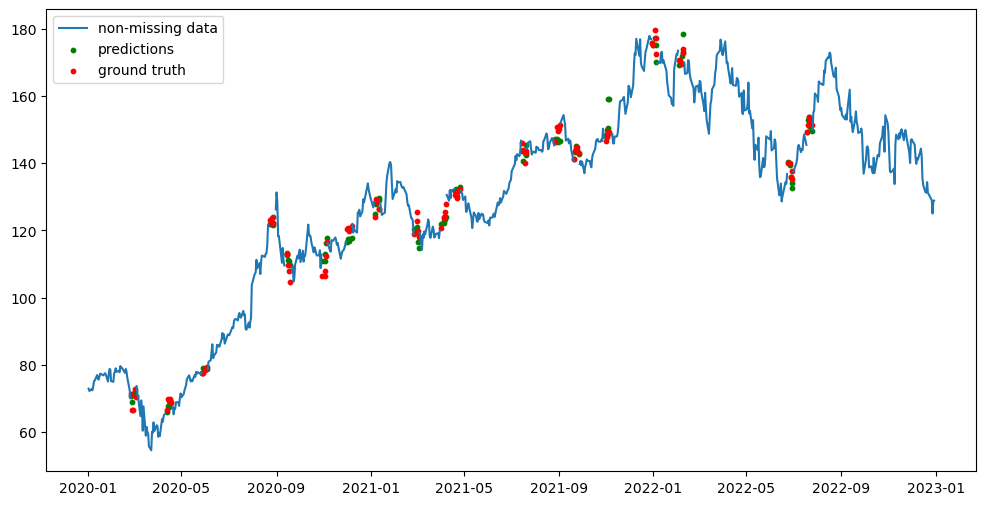

In [36]:
fig, ax=plt.subplots(figsize=(12,6))
plt.plot(df_apple_train['5day'], label='non-missing data')
plt.scatter(df_apple_train.iloc[indices_to_mask[4]].index, pred2[4], s=10, c='g', marker='o', label='predictions')
plt.scatter(df_apple_train.iloc[indices_to_mask[4]].index, df_apple_train.iloc[indices_to_mask[4]].Close, s=10, c='r', label='ground truth' )
ax.legend()

In [76]:

print(f'5day: root mean squared error {rmse(df_apple_train.iloc[indices_to_mask[4]].Close, pred2[4])}')
print(f'5day: root mean squared percentage error {rmspe(df_apple_train.iloc[indices_to_mask[4]].Close, pred2[4])}')
print(f"5day: mean squared error {mse(df_apple_train.iloc[indices_to_mask[4]].Close, pred2[4])}")
    

for i in range(max_interval):
   scores.loc[f'{i+1}day', 'OLS_NVDA']=mse(df_apple_train.iloc[indices_to_mask[i]].Close, pred2[i])

scores

5day: root mean squared error 2.7253006610624633
5day: root mean squared percentage error 0.2222917651245418
5day: mean squared error 7.4272636931875


,LinearInterp,OLS_NVDA,XGBoostRegr_NVDA
1day,3.481799,2.610944,None
2day,5.494895,3.855759,None
3day,7.546769,4.623537,None
4day,8.81562,6.117013,None
5day,8.4616,7.427264,None


In [38]:
from xgboost import XGBRegressor    
from sklearn.model_selection import cross_val_score

In [39]:
xgbr=XGBRegressor(n_estimators = 500,
                                  max_depth = 1,
                                  learning_rate = .1)
y=df_apple_train['5day'].pct_change(fill_method=None).dropna()
X=df_nvidia_train.Close.pct_change(fill_method=None).loc[y.index]


cv_score=cross_val_score(xgbr, X.values.reshape(-1,1),y.values.reshape(-1,1), cv=5, scoring='neg_root_mean_squared_error')
print(-cv_score.mean())

xgbr.fit(X.values.reshape(-1,1),y.values.reshape(-1,1))

0.016457053199311088


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
pred=xgbr.predict(df_nvidia_train.Close.pct_change(fill_method=None).iloc[indices_to_mask[4]].values.reshape(-1,1))
pred=pd.Series(data=pred, index= df_nvidia_train.index[indices_to_mask[4]])

pred_xgbr=[]
for i in range(max_interval):
    pred_xgbr.append(get_pred(pred, df_apple_train, missing_indices_cleaned, i+1))

print(pred_xgbr[4])

print(f'5day: root mean squared error {rmse(df_apple_train.iloc[indices_to_mask[4]].Close, pred_xgbr[4])}')
print(f'5day: root mean squared percentage error {rmspe(df_apple_train.iloc[indices_to_mask[4]].Close, pred_xgbr[4])}')
print(f"5day: mean squared error {mse(df_apple_train.iloc[indices_to_mask[4]].Close, pred_xgbr[4])}")
    

for i in range(max_interval):
   scores.loc[f'{i+1}day', 'XGBoostRegr_NVDA']=mse(df_apple_train.iloc[indices_to_mask[i]].Close, pred_xgbr[i])

scores

[70.59772378389816, 68.42259092434074, 69.88170978754921, 70.3475996439974, 68.91073765368084, 66.35950528743561, 67.74676540303027, 67.75332747301222, 69.16972574926534, 69.17642564967089, 77.50348046210819, 79.20921444522415, 79.21688678803362, 79.42945922198743, 79.2614428140867, 122.00714653334838, 122.33454334417927, 122.66281869921669, 122.67470003400365, 125.52223142994237, 111.13310789320869, 111.64828272792359, 109.54666017537224, 109.62772893661723, 108.33532032614713, 110.52181963691979, 110.81839645479056, 112.88440334422634, 115.2755048677447, 117.22822398470828, 117.0043462191351, 117.66057168534793, 117.67196849375527, 118.33193835710013, 118.64947302894791, 124.44219933349729, 126.20813920363025, 125.94117228223193, 126.78080134760349, 126.79308155737972, 120.7667971799024, 121.3266304821078, 119.43373769701192, 116.64240311273502, 114.82259189395316, 122.12890678337129, 122.8138736361571, 122.82576960238899, 123.61688007915062, 124.3101923139781, 131.90843683280917, 13

,LinearInterp,OLS_NVDA,XGBoostRegr_NVDA
1day,3.481799,2.610944,2.908562
2day,5.494895,3.855759,4.224534
3day,7.546769,4.623537,4.640226
4day,8.81562,6.117013,7.339969
5day,8.4616,7.427264,9.329647


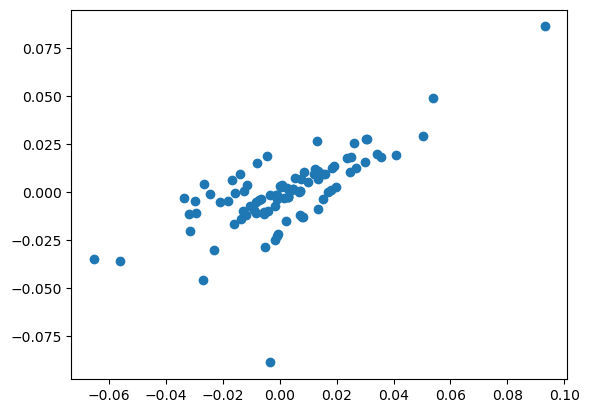

In [41]:
ground_truth=df_apple_train.Close.pct_change(fill_method=None).iloc[indices_to_mask[4]]
residuals=ground_truth-pred
plt.scatter( x=ground_truth, y=residuals)

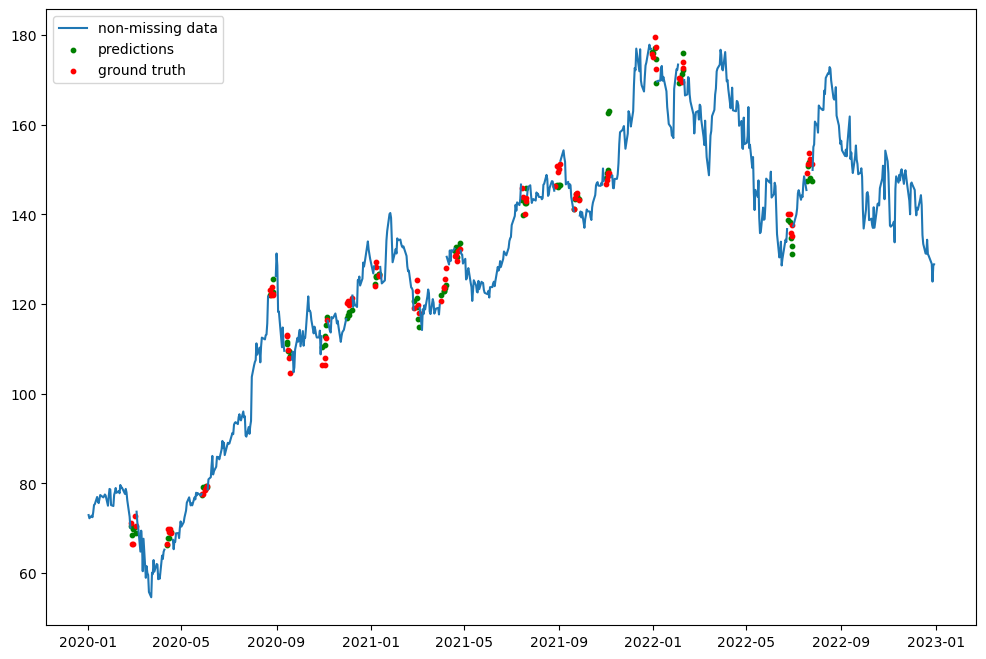

In [42]:
fig, ax=plt.subplots(figsize=(12,8))
plt.plot(df_apple_train['5day'], label='non-missing data')
plt.scatter(df_apple_train.iloc[indices_to_mask[4]].index, pred_xgbr[4], s=10, c='g', marker='o', label='predictions')
plt.scatter(df_apple_train.iloc[indices_to_mask[4]].Close.index, df_apple_train.iloc[indices_to_mask[4]].Close, s=10, c='r', label='ground truth' )
ax.legend()

In [49]:
tickers_list

['AAPL', 'NVDA', 'MSFT', 'TSM', 'META', 'GOOG']

In [79]:
train_df_dict[t]

,Close
Date,
2023-01-03 00:00:00-05:00,143.079788
2023-01-04 00:00:00-05:00,147.417679
2023-01-05 00:00:00-05:00,142.580032
2023-01-06 00:00:00-05:00,148.517120
2023-01-09 00:00:00-05:00,156.203369
...,...
2023-12-22 00:00:00-05:00,488.277069
2023-12-26 00:00:00-05:00,492.766907
2023-12-27 00:00:00-05:00,494.146820


Text(0, 0.5, 'Apple Dailty return, %')

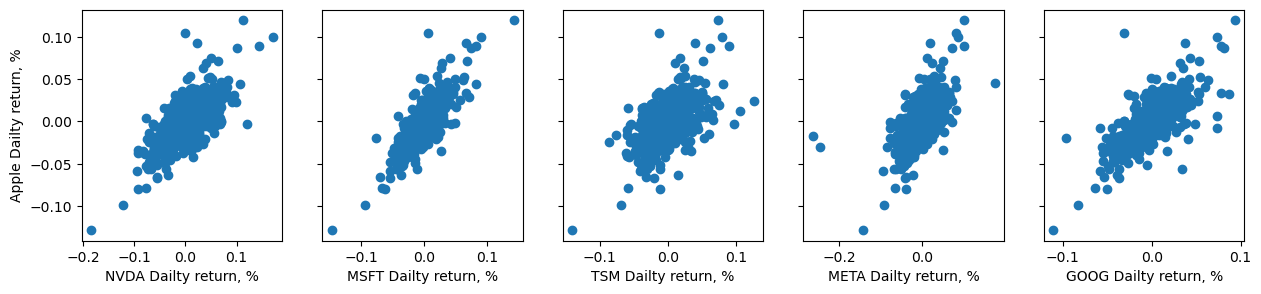

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15,3), sharey=True)
for i, (ax,t) in enumerate(zip(axes, tickers_list[1:])):
        ax.scatter(train_df_dict[t].Close.pct_change(fill_method=None), df_apple_train.Close.pct_change(fill_method=None))
        ax.set_xlabel(f'{t} Dailty return, %')

axes[0].set_ylabel('Apple Dailty return, %')

In [82]:

endog = df_apple_train['5day'].pct_change(fill_method=None)

for t in tickers_list[1:]:
   exog = sm.add_constant(train_df_dict[t].Close.pct_change(fill_method=None))
   lr=sm.OLS(endog, exog , missing='drop').fit()
   print(lr.summary())

   #ind=[t for t in range(len(df_apple_train)) if t not in indices_to_mask[4]]
   pred=lr.predict(sm.add_constant(train_df_dict[t].Close.pct_change(fill_method=None).iloc[indices_to_mask[4]]))
   pred2=[]
   for i in range(max_interval):
      pred2.append(get_pred(pred, df_apple_train, missing_indices_cleaned, i+1))
   
   scores['OLS_'+t]=np.NaN
   for i in range(max_interval):
      scores.loc[f'{i+1}day', 'OLS_'+t]=mse(df_apple_train.iloc[indices_to_mask[i]].Close, pred2[i])


    



scores

                            OLS Regression Results                            
Dep. Variable:                   5day   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     748.1
Date:                Fri, 31 May 2024   Prob (F-statistic):          1.22e-109
Time:                        02:09:56   Log-Likelihood:                 1742.5
No. Observations:                 641   AIC:                            -3481.
Df Residuals:                     639   BIC:                            -3472.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.001      0.175      0.8

,LinearInterp,OLS_NVDA,XGBoostRegr_NVDA,OLS_MSFT,OLS_TSM,OLS_META,OLS_GOOG
1day,3.481799,2.610944,2.908562,3.439283,5.835757,25.881598,7.860941
2day,5.494895,3.855759,4.224534,4.010500,7.997259,27.117506,8.467677
3day,7.546769,4.623537,4.640226,5.109068,8.589889,31.126467,9.176336
4day,8.81562,6.117013,7.339969,6.115092,10.420287,36.019763,10.824306
5day,8.4616,7.427264,9.329647,7.249742,11.799825,37.721596,11.257055


# Evaluating on the test set

In [91]:
max_interval=5
intervals=[1, 2, 3, 4, 5]
missing_indices_test=[i for i in range(len(apple_test)) if np.isnan(apple_test['1day'].iloc[i])]
indices_to_mask_test= [np.ravel(np.array([list(range(i,i+interval)) for i in missing_indices_test])) for interval in intervals]
missing_indices_test
test_df_dict

indices_to_mask_test

[array([ 29,  60,  95, 124, 159, 190, 219]),
 array([ 29,  30,  60,  61,  95,  96, 124, 125, 159, 160, 190, 191, 219,
        220]),
 array([ 29,  30,  31,  60,  61,  62,  95,  96,  97, 124, 125, 126, 159,
        160, 161, 190, 191, 192, 219, 220, 221]),
 array([ 29,  30,  31,  32,  60,  61,  62,  63,  95,  96,  97,  98, 124,
        125, 126, 127, 159, 160, 161, 162, 190, 191, 192, 193, 219, 220,
        221, 222]),
 array([ 29,  30,  31,  32,  33,  60,  61,  62,  63,  64,  95,  96,  97,
         98,  99, 124, 125, 126, 127, 128, 159, 160, 161, 162, 163, 190,
        191, 192, 193, 194, 219, 220, 221, 222, 223])]

Text(0, 0.5, 'Apple Dailty return')

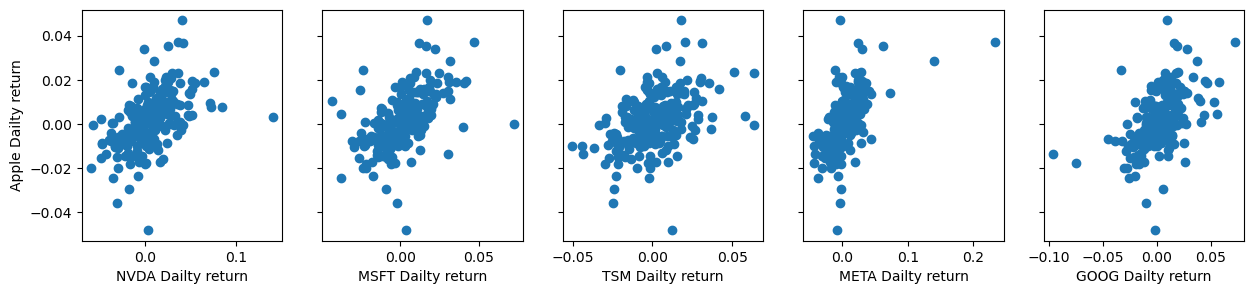

In [88]:

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15,3), sharey=True)
for i, (ax,t) in enumerate(zip(axes, tickers_list[1:])):
        ax.scatter(test_df_dict[t].Close.pct_change(fill_method=None), apple_test['5day'].pct_change(fill_method=None))
        ax.set_xlabel(f'{t} Dailty return')

axes[0].set_ylabel('Apple Dailty return')

In [95]:

baseline_test=apple_test[['Close']].copy()
for i in range(max_interval):
    baseline_test[f'{i+1}day']=baseline_test.Close
    baseline_test.iloc[indices_to_mask_test[i], 2*i+1]=np.NaN
    baseline_test[f'{i+1}day_imputed']=np.NaN
    for j in missing_indices_test:
        avg=(baseline_test.Close.iloc[j-1]+baseline_test.Close.iloc[j+i+1])/2
        for k in range(i+1):
            baseline_test.iloc[k+j, 2*i+2 ]=avg


scores_test=pd.DataFrame({'LinearInterp': (np.zeros(5)).fill(np.NaN), 'OLS_NVDA': (np.zeros(5)).fill(np.NaN)}, index=['1day', '2day', '3day', '4day', '5day'])
for i in range(max_interval):
    scores_test.loc[f'{i+1}day', 'LinearInterp']=mse(baseline_test[['Close', f'{1+i}day_imputed']].dropna().Close, baseline_test[['Close', f'{1+i}day_imputed']].dropna()[f'{1+i}day_imputed'])

endog = apple_test['5day'].pct_change(fill_method=None)

for t in tickers_list[1:]:
   exog = sm.add_constant(test_df_dict[t].Close.pct_change(fill_method=None))
   lr=sm.OLS(endog, exog , missing='drop').fit()
   print(lr.summary())

   #ind=[t for t in range(len(df_apple_train)) if t not in indices_to_mask[4]]
   pred=lr.predict(sm.add_constant(test_df_dict[t].Close.pct_change(fill_method=None).iloc[indices_to_mask_test[4]]))
   pred2=[]
   for i in range(max_interval):
      pred2.append(get_pred(pred, apple_test, missing_indices_test, i+1))
   
   scores['OLS_'+t]=np.NaN
   for i in range(max_interval):
      scores_test.loc[f'{i+1}day', 'OLS_'+t]=mse(apple_test.iloc[indices_to_mask_test[i]].Close, pred2[i])



scores_test

                            OLS Regression Results                            
Dep. Variable:                   5day   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     68.60
Date:                Fri, 31 May 2024   Prob (F-statistic):           1.55e-14
Time:                        02:33:21   Log-Likelihood:                 637.22
No. Observations:                 207   AIC:                            -1270.
Df Residuals:                     205   BIC:                            -1264.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.001      0.817      0.4

,LinearInterp,OLS_NVDA,OLS_MSFT,OLS_TSM,OLS_META,OLS_GOOG
1day,0.679228,2.674105,0.681202,2.441398,1.259507,1.114916
2day,3.129658,4.843031,2.620679,4.922070,4.736172,3.579636
3day,2.631338,5.405049,3.652667,5.625140,5.707737,4.684455
4day,3.896684,6.219419,4.016066,6.056652,6.556161,5.129990
5day,4.21361,10.88796,4.941851,8.558410,8.394692,5.988414
